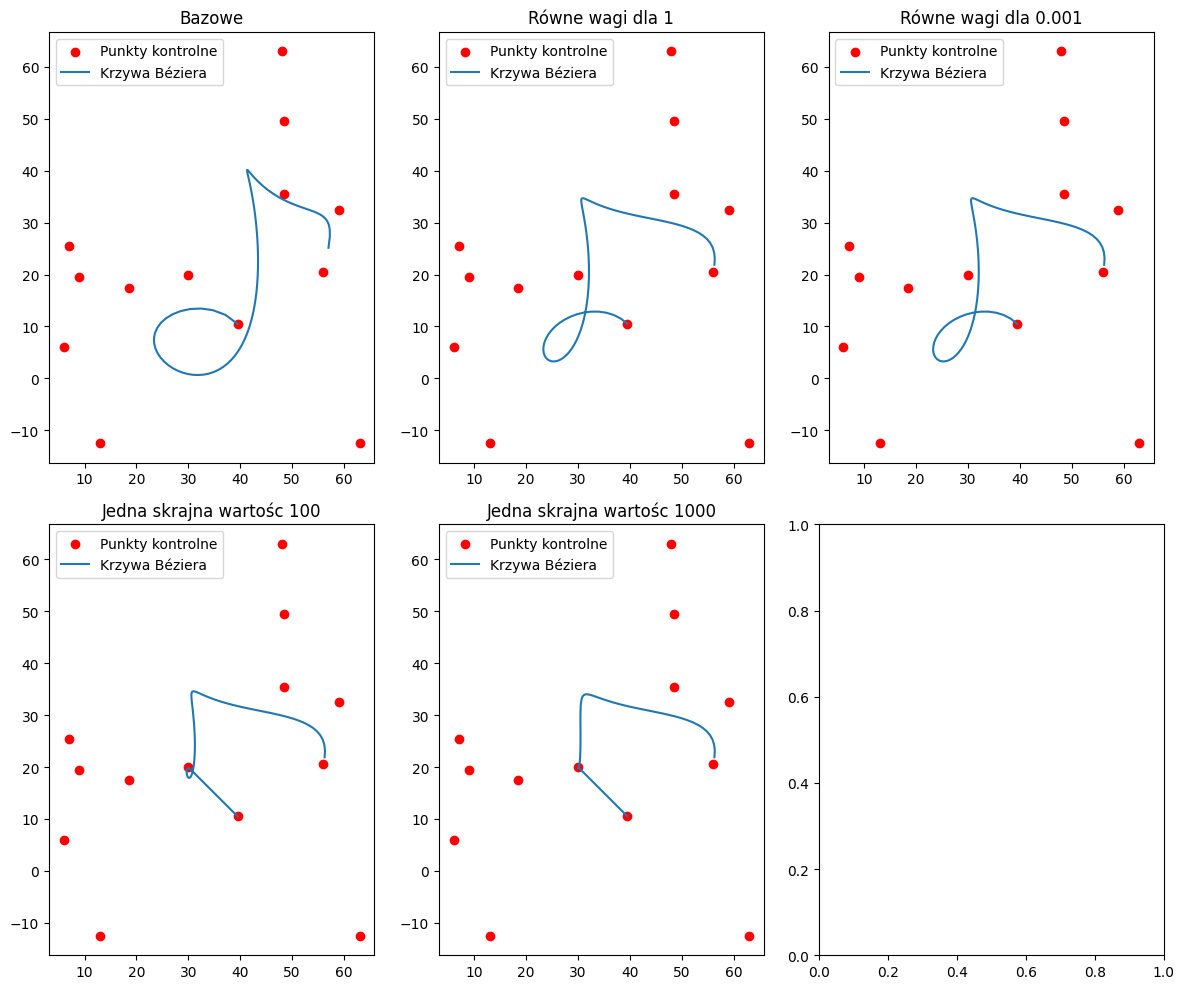

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n - 1)

def calc_binom(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def P(n, t, W):
    binom = 1
    mult = 1
    res = W[n]
    for k in range(1, n + 1):
        binom = binom * (n - k + 1) / k
        mult = mult * (1 - t)
        res = res * t + binom * mult * W[n - k]
    return res

def R(n, t, W, w):
    return P(n, t, [w[i] * W[i] for i in range(n + 1)]) / P(n, t, w)

# Punkty kontrolne
coordinates = [
    (39.5, 10.5), (30, 20), (6, 6), (13, -12.5), (63, -12.5), 
    (18.5, 17.5), (48, 63), (7, 25.5), (48.5, 49.5), (9, 19.5), 
    (48.5, 35.5), (59, 32.5), (56, 20.5)
]
x_values = [coord[0] for coord in coordinates]
y_values = [coord[1] for coord in coordinates]

# Zestawy wag
weights_variants = {
    "Bazowe": [1, 2, 3, 2.5, 6, 1.5, 5, 1, 2, 1, 3, 5, 1],
    "Równe wagi dla 1": [1] * len(coordinates),
    "Równe wagi dla 0.001": [0.001] * len(coordinates),
    "Jedna skrajna wartośc 100": [1, 100, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "Jedna skrajna wartośc 1000": [1, 1000, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, weights) in zip(axes, weights_variants.items()):
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(x_values, y_values, color='red', label="Punkty kontrolne")

    x_res = []
    y_res = []
    t = 0
    prec = 0.01
    while t <= 1:
        x_res.append(R(len(coordinates) - 1, t, x_values, weights))
        y_res.append(R(len(coordinates) - 1, t, y_values, weights))
        t += prec

    ax.plot(x_res, y_res, label="Krzywa Béziera")
    ax.set_title(name)
    ax.legend()

plt.tight_layout()
plt.show()


Jeśli wszystkie wagi są identyczne, np. $w_i = C$, możemy przekształcić wzór:

$$
R(t) = \frac{C \sum_{i=0}^{n} B_i^n (t) P_i}{C \sum_{i=0}^{n} B_i^n (t)}
$$

Ponieważ $C$ występuje w liczniku i mianowniku, upraszcza się do:

$$
R(t) = \sum_{i=0}^{n} B_i^n (t) P_i
$$

co oznacza, że **krzywa jest identyczna jak klasyczna krzywa Béziera**.
